# Material de apoio

Ainda não incluímos nada aqui.

# Pensando testes de hipótese como modelos lineares: relação entre testes e regressão linear

Antes de retomar o tema de testes de hipótese, e expandir nosso repertório de métodos estatísticos, vamos voltar aos dados iniciais dos respondentes no estudo experimental sobre veículos no parque.

Nosso objetivo será olhar para o resultado de uma regressão linear com um olhar um pouco diferente, em especial para variáveis categóricas.

Vamos carregar os dados:

In [1]:
import pandas as pd

experimental_guide = pd.read_csv("https://bit.ly/study3-exp-guide")

experimental_guide.head(2)

,ResponseId,case,moral,rule_violation,text,EndDate,Duration (in seconds),Finished,consent,idade,...,politica,school,lawyer,anos_formado,periodo,aluno_noel,familiarizado,previous_research,pergunta,flagged_for_exclusion
0,R_0MzzLNxqX4wqy5P,alice4,NaN,NaN,6.0,2018-04-26 22:18:05,226,1,1,18.0,...,2.0,2.0,2.0,NaN,1.0,0,NaN,2,text,0
1,R_0MzzLNxqX4wqy5P,felipe1,NaN,NaN,4.0,2018-04-26 22:18:05,226,1,1,18.0,...,2.0,2.0,2.0,NaN,1.0,0,NaN,2,text,0


Vamos começar fazendo um teste de hipótese com base em uma ideia simples, ainda que não seja algo que faça relativamente ingênuo e sem muita implicação prática.

Vamos supor que alunos do Prof. Noel Struchiner, um dos autores do artigo dos quais os dados foram retirados, atribuem maior violação ao texto das regras no geral.

Para fins didáticos, vamos mesmo ignorar a diferença entre os vários casos e fazer um teste com todas as respostas.

In [14]:
violacao_texto_alunos = experimental_guide.query("aluno_noel == 1")["text"].dropna()

violacao_texto_nao_alunos = experimental_guide.query("aluno_noel == 0")["text"].dropna()

Um ponto importante: após selecionarmos a coluna removemos os valores nulos de cada conjunto. Isso é necessário para evitar problemas com a função de teste.

Lembrando, que há valores não preenchidos porque nesse estudo cada participante respondia apenas sobre violação da norma, do texto, ou do propósito da regra.

In [19]:
from scipy.stats import ttest_ind

ttest_ind(violacao_texto_alunos, violacao_texto_nao_alunos,)

TtestResult(statistic=1.1459974176442178, pvalue=0.2528580278824185, df=258.0)

Nosso resultado indica que essa hipótese não parece ser suportada pelos dados, ao menos como analisados.

Podemos ver que o valor-p indica uma diferença não significativa da média dos dois conjuntos de dados.

Lembrando o que falamos em nossa aula introdutória de estatística inferencial, o valor da estatística indica algo sobre a magnitude da diferença, mas não é algo que podemos interpretar diretamente.

Considere agora que queremos fazer uma regressão linear expressa pelo seguinte modelo:

In [ ]:
especificacao_modelo = "text ~ aluno_noel"

Antes de continuar, tente explicar o que o modelo que será criado dessa fórmula significa. Qual a relação queremos avaliar? Qual a variável dependente e independente?


Veja agora o resultado:

In [20]:
from statsmodels.formula.api import ols

# primeiro, vamos ficar apenas com as respostas sobre texto
df_reg_alunos_noel = experimental_guide.dropna(subset=["text"])

reg = ols("text ~ aluno_noel", data=df_reg_alunos_noel).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   text   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.313
Date:                Wed, 08 Jan 2025   Prob (F-statistic):              0.253
Time:                        16:30:27   Log-Likelihood:                -595.14
No. Observations:                 260   AIC:                             1194.
Df Residuals:                     258   BIC:                             1201.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8659      0.187     20.660      0.000       3.497       4.234
aluno_noel     0.3529      0.308      1.146      0.253      -0.253       0.959
==============================================================================
Omnibus:                     1887.342   Durbin-Watson:                   2.119
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.999
Skew:                           0.047   Prob(JB):                     3.06e-07
Kurtosis:                       1.339   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Como podemos interpretar o resultado da variável independente que testamos?

Lembrando, que se trata de uma variável categórica.

Compare os números obtidos do valor-p e da estatística t com o resultado do teste de hipótese que fizemos anteriormente.

Não é uma coincidência que os valores sejam basicamente iguais! Todos os modelos estatísticos que estamos vendo usam, em última instância, testes de hipótese. Quando simplificamos a regressão para apenas uma variável que distingue dois grupos, temos os resultados equivalentes a um teste t.

Ainda, temos uma vantagem adicional: O coeficiente da regressão nos diz diretamente qual a diferença média entre os dois grupos na escala de medida da variável dependente. Isso facilita bastante nossa interpretação do resultado.

Poderíamos formular, se fosse significativa, usando a linguagem mais comum da regressão:  Para cada 1 unidade de aumento da variável `aluno_noel` (que só pode mudar de 0 para 1), a violação de regra esperada seria de 0.35. Como só temos dois grupos, isso significa que essa é a diferença da média deles! Contudo, como vimos, a diferença não é significativa.

Vamos voltar e tentar pensar sobre os dados graficamente, como fizemos quando começamos a ver regressão e correlação com duas variáveis contínuas.

Como devemos esperar o comportamento do gráfico se houver uma diferença significativa entre os dois grupos? E se não houve, como no nosso caso?

E se adicionarmos algum indicador gráfico representando a média de cada grupo, como seria o gráfico? Vamos ver agora:

Text(0, 0.5, 'Violação do texto')

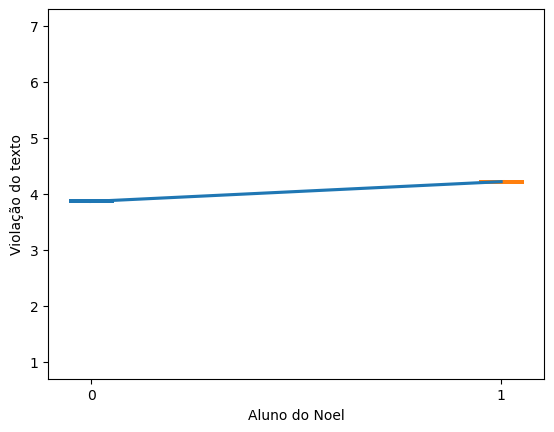

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot regression with mean for each group
fig, ax = plt.subplots()

# vamos adicionar apenas um traço com a média
sns.pointplot(
    x="aluno_noel",
    y="text",
    capsize=0.1,
    markers="",
    errorbar=("sd", 0),
    data=df_reg_alunos_noel,
    hue="aluno_noel",
    legend=False,
    ax=ax,
)
# vamos fazer a regressão com o scatterplot invisível
sns.regplot(
    x="aluno_noel",
    y="text",
    data=df_reg_alunos_noel,
    ci=None,
    ax=ax,
    scatter_kws={"alpha": 0},
)

ax.set_xlabel("Aluno do Noel")
ax.set_ylabel("Violação do texto")

Como a diferença é não significativa, podemos ver que as médias são muito próximas. Mas cada um dos traços indica a média dos grupos. A diferença entre eles é, como vimos, de apenas 0.35 em uma escala de vai de 1 a 7.


### Desafio

Antes de prosseguirmos, uma pergunta. Como seria o gráfico se não ocultássemos as observações do scatteplot? Lembre-se que não fizemos nenhum processamento e cada linha representa a resposta dos respondentes a um dos cenários na escala original.


# Mais testes de hipótese

Em nossa aula de introdução a problemas de estatística inferencial usamos um teste comparamos a média de duas amostras **independentes** com o teste t de Student. Em inglês, essa modalidade é chamada de *two sample t-test*. Em nosso exemplo, as amostras eram independentes porque imaginamos que as observações tinham origem em dados diferentes, assim uma de fato não tinha relação com o valor observado em outra.

Esse não é sempre o caso, e existem outras formulações do teste t que não iremos abordar em nosso curso. Em sua formulação mais simples, por exemplo, queremos saber se a média de um único conjunto de observações (*one sample*) é diferente de um valor de referência. Por outro lado, temos o teste t pareado, em inglês *paired t-test*, que é usado quando as observações são dependentes. Isso acontece quando os valores observados em uma amostra estão relacionados ao da outra amostra sob análise, por exemplo, porque foram coletadas de um mesmo  indivíduo em momentos diferentes. Um exemplo clássico é o caso em que estamos testando um medicamento, por exemplo para pressão arterial, e temos medições antes e depois do tratamento. Nesse caso, cada observação da primeira amostra está relacionada com uma observação da segunda amostra.

Podemos também nos deparar com situações em que desejamos fazer comparações ainda mais complexas. Por exemplo, porque temos outros fatores que podem influenciar a média. Ou ainda, porque precisamos fazer comparações para mais de dois grupos. Pense, por exemplo, que poderíamos verificar se há diferença no tempo para julgamento entre todas as classes de controle concentrado no STF. Nesse caso teríamos 4 grupos: ADIs, ADCs, ADPFs, e ADOs.

Como poderíamos lidar com esse problema? Você tem alguma sugestão?


A partir do que vismo até aqui você poderia, de forma criativa, dar algumas sugestões. Por exemplo:

1. Podemos formular um modelo de regressão linear e ver o valor-p de cada grupo, representado na variável categórica;
2. Podemos fazer um teste t para cada par de grupos. Isso resultaria em 6 testes diferentes;


Essas intuições são boas, e iremos construir sobre elas. 

Retomando o exemplo do STF, suponha que medimos a passagem do tempo em meses e montamos um modelo para comparar o tempo até o julgamento para as diferentes classes processuais. O resultado poderia ser algo como:

<table>
  <tr>
    <th></th>
    <th>coef</th>
    <th>std err</th>
    <th>p&gt;|t|</th>
  </tr>
  <tr>
    <td>classe[T.ADC]</td>
    <td>5.79</td>
    <td>0.75</td>
    <td>0.003</td>
  </tr>
  <tr>
    <td>classe[T.ADPF]</td>
    <td>-4.79</td>
    <td>0.75</td>
    <td>0.000</td>
  </tr>
  <tr>
    <td>classe[T.ADO]</td>
    <td>2.79</td>
    <td>0.75</td>
    <td>0.33</td>
  </tr>
</table>


Você consegue interpretar o resultado? Qual informação não temos e seria a limitação dessa abordagem?


O problema é que a regressão linear compara a média de cada grupo com um único grupo de referência (o que é omitido da tabela de resultados). Assim, não sabemos se há diferença entre as classes ADC, ADPF e ADO, apenas de cada uma delas com ADIs.

Poderíamos resolver esse problema com a segunda abordagem, fazendo um teste t para cada par de grupos. Mas isso tem seus próprios problemas. Primeiro, podemos terminar com um número muito grande de testes se tivermos muitas categorias. Isso poderia ser ruim de executar, ou de comunicar os resultados, mas contornável.

Um segundo problema, mais importante, dessa abordagem é que quando realizamos muitos estes consecutivos aumentamos muito a chance de erro. Especificamente, temos uma alta chance de cometer um erro do tipo I, rejeitando a hipótese nula quando ela é, de fato, verdadeira. Isso é conhecido como o problema da multiplicidade de testes.

No nosso caso, se todas as premissas do teste t forem verdadeiras e não houvesse nenhuma diferença significativa entre os grupos, ainda assim teríamos 25% de chance de rejeitar a hipótese nula para pelo menos um dos pares de grupos.

Existem formas de contornar esse problema com métodos de correção do valor-p. Isso é necessário se queremos ter informações sobre os pares de grupo individualmente. Mas isso é um assunto que não iremos abordar em nosso curso.

Ainda assim, com algo muito próximo do que já sabemos, podemos obter uma solução para o problema de se há uma relação significativa entre a Classe, no geral, e o tempo de julgamento.

Quando temos mais de 2 grupos, e queremos comparar suas médias podemos usar o teste ANOVA.  Para fazer isso, precisamos montar um modelo de regressão linear com a variável categórica que queremos comparar.

Depois disso, podemos usar uma função que analisa o modelo e nos da as informações em uma tabela de resultados ANOVA.

Precisamos que nosso modelo tenha uma variável de fato codificada como categórica nesse caso. Vamos converter a variável `lawyer` com as categorias para testar se o comportamente é diferente de acordo com a variação na formação jurídica.

Nosso dicionário é: 1 - advogado, 2 - estudante de direito, 3 - outro.

In [47]:
experimental_guide["lawyer"] = experimental_guide["lawyer"].replace(
    {1: "lawyer", 2: "student", 0: "other"}
)

Pronto agora podemos fazer nossa regressão e o teste ANOVA.

Vamos fazer isso para a avaliação de violação da regra como um todo:

In [51]:
from statsmodels.stats.api import anova_lm

lawyer_model = ols("text ~ lawyer", data=experimental_guide).fit()

anova_lm(lawyer_model)

,df,sum_sq,mean_sq,F,PR(>F)
lawyer,2.0,7.487103,3.743552,0.643964,0.526079
Residual,249.0,1447.508929,5.813289,NaN,NaN


Podemos ver que não parece haver uma diferença significativa a partir da formação jurídica. Entretanto, esse modelo é muito simples, e não considera, por exemplo, que os casos são construídos para serem diferentes do ponto de vista do componente violado da regra.

## Desafio

Podemos comparar o resultado com o que seria obtido da regressão.

Gere abaixo a tabela de regressão usando o método `summary` do modelo. Descreva o resultado tanto da anova, quanto do que foi observado no resultado da regressão.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   text   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.6440
Date:                Wed, 08 Jan 2025   Prob (F-statistic):              0.526
Time:                        19:19:51   Log-Likelihood:                -577.84
No. Observations:                 252   AIC:                             1162.
Df Residuals:                     249   BIC:                             1172.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.1250      0.322     12.803      0.000       3.490       4.760
lawyer[T.lawyer]      0.0536      0.416      0.129      0.898      -0.766       0.873
lawyer[T.student]    -0.3125      0.395     -0.792      0.429      -1.090       0.465
==============================================================================
Omnibus:                     1859.256   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.013
Skew:                           0.031   Prob(JB):                     5.01e-07
Kurtosis:                       1.339   Cond. No.                         4.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Conclusão

Ao longo da aula de hoje vimos dois tópicos diferentes.

Em primeiro lugar, vimos como testes de hipótese e regressão linear estão intimamente relacionados.  E como podemos usar uma regressão como teste, e isso pode nos ajudar na interpretação do resultado.

Em segundo lugar, vimos como podemos fazer comparações entre mais de dois grupos com o teste ANOVA. Contudo, apenas arranhamos a superfício desse tópico. Modelos ANOVA nos permitem fazer comparações muito mais complexas, e são uma ferramenta poderosa para a análise de dados, inclusive experimentais.

A título de ilustração, poderíamos construir um modelo anova para avaliar a influência da formação mas considerando tanto que haverão diferenças individuais entre os participantes, o modelo pode obter essa informação das múltiplas respostas de cada indivíduo. E podemos também considerar a diferença entre os diversos cenários construídos.

Esse modelo, chamado de efeitos mistos, é bem mais complexo, e não vamos abordá-lo aqui.